># <center> <font color='red'> CMPE428 - DATA SCIENCE </font> </center>
> ##  <font color="green">In Lab Task # 03</font>
> ###  <font color="yellow">Group # 02</font>


🧪 Lab Exercise: Data Analysis with Pandas, Matplotlib, and Seaborn

---


*Dataset*: [Social Media and Mental Health Balance](https://www.kaggle.com/datasets/ayeshaimran123/social-media-and-mental-health-balance)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Q1. Load the dataset into a Pandas DataFrame and display:
- The first 10 rows.

- Show the shape of the dataset (rows, columns).

- List all column names and their data types.

- Show how many missing values (NaNs) there are in each column.

In [14]:
data=pd.read_csv("Mental_Health_and_Social_Media_Balance_Dataset.csv")
print(data.head(10))
print(data.shape)
print(data.dtypes)
print(data.isnull().sum())

  User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44    Male                     3.1                  7.0   
1    U002   30   Other                     5.1                  7.0   
2    U003   23   Other                     7.4                  6.0   
3    U004   36  Female                     5.7                  7.0   
4    U005   34  Female                     7.0                  4.0   
5    U006   38    Male                     6.6                  5.0   
6    U007   26  Female                     7.8                  4.0   
7    U008   26  Female                     7.4                  5.0   
8    U009   39    Male                     4.7                  7.0   
9    U010   39  Female                     6.6                  6.0   

   Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
0                 6.0                        2.0                       5.0   
1                 8.0                        5.0              

Q2. Create new a sub-dataframe from your original dataframe which does not include Age,Exercise_Frequency(week), and Stress_Level(1-10)

In [21]:
sub_data = data.drop(columns=['Age', 'Exercise_Frequency(week)', 'Stress_Level(1-10)'])
print(sub_data.head(10))

  User_ID  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001    Male                     3.1                  7.0   
1    U002   Other                     5.1                  7.0   
2    U003   Other                     7.4                  6.0   
3    U004  Female                     5.7                  7.0   
4    U005  Female                     7.0                  4.0   
5    U006    Male                     6.6                  5.0   
6    U007  Female                     7.8                  4.0   
7    U008  Female                     7.4                  5.0   
8    U009    Male                     4.7                  7.0   
9    U010  Female                     6.6                  6.0   

   Days_Without_Social_Media Social_Media_Platform  Happiness_Index(1-10)  
0                        2.0              Facebook                   10.0  
1                        5.0              LinkedIn                   10.0  
2                        1.0               Yo

Q.3 Display only the colums 2-5 and last 30 rows

In [17]:
column=sub_data.columns[2:5]
subs=sub_data.tail(30)[column]
print(subs)
print(subs.shape)

     Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  Days_Without_Social_Media
470                     4.4                  5.0                        4.0
471                     6.8                  5.0                        3.0
472                     7.4                  3.0                        5.0
473                     5.7                  7.0                        3.0
474                     6.3                  7.0                        3.0
475                     9.3                  3.0                        2.0
476                     3.4                  8.0                        4.0
477                     3.3                  9.0                        4.0
478                     6.8                  6.0                        2.0
479                     9.0                  4.0                        3.0
480                     5.0                  7.0                        2.0
481                     8.6                  4.0                        2.0
482         

Q4. Display a summary of descriptive statistics for numerical columns

In [18]:
print(data.describe(include='number'))

              Age  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
count  500.000000              500.000000           500.000000   
mean    32.988000                5.530000             6.304000   
std      9.960637                1.734877             1.529792   
min     16.000000                1.000000             2.000000   
25%     24.000000                4.300000             5.000000   
50%     34.000000                5.600000             6.000000   
75%     41.000000                6.700000             7.000000   
max     49.000000               10.800000            10.000000   

       Stress_Level(1-10)  Days_Without_Social_Media  \
count          500.000000                 500.000000   
mean             6.618000                   3.134000   
std              1.542996                   1.858751   
min              2.000000                   0.000000   
25%              6.000000                   2.000000   
50%              7.000000                   3.000000   
75%          


Q5. Determine average screen time (or social-media usage) by social media platform.



In [28]:
print(data.groupby("Social_Media_Platform")["Daily_Screen_Time(hrs)"].mean())

Social_Media_Platform
Facebook       5.658025
Instagram      6.079730
LinkedIn       5.291954
TikTok         5.457895
X (Twitter)    5.306818
YouTube        5.478667
Name: Daily_Screen_Time(hrs), dtype: float64


Q6. Find and display average Sleep_Quality for each Social_Media_Platform

In [29]:
print(data.groupby("Social_Media_Platform")["Sleep_Quality(1-10)"].mean())

Social_Media_Platform
Facebook       6.098765
Instagram      5.905405
LinkedIn       6.551724
TikTok         6.463158
X (Twitter)    6.386364
YouTube        6.333333
Name: Sleep_Quality(1-10), dtype: float64


Q7. Which platform group appears to have best sleep quality?

In [32]:
print(data.groupby("Social_Media_Platform")["Sleep_Quality(1-10)"].sum().sort_values(ascending=False).head(1).reset_index())

  Social_Media_Platform  Sleep_Quality(1-10)
0                TikTok                614.0


Q8. Plot a bar chart showing average Daily Screen Time per Gender.

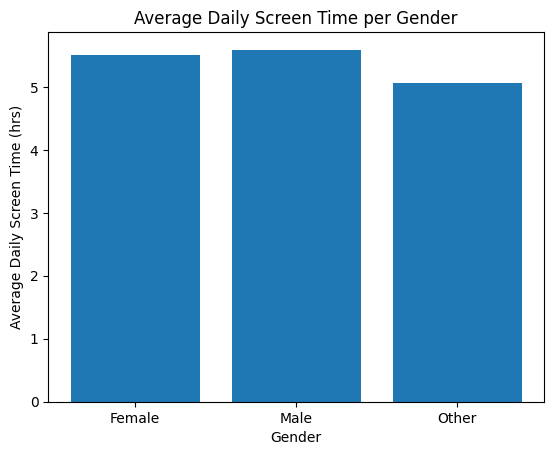

In [38]:
Screentime = data.groupby("Gender")["Daily_Screen_Time(hrs)"].mean()
plt.bar(Screentime.index, Screentime.values)
plt.xlabel("Gender")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.title("Average Daily Screen Time per Gender")
plt.show()

Using Matplotlib, Create a line plot showing the average Happiness_Index across different Stress_Level values (1 to 10).
Interpret the trend in one sentence.

*Include title and axis Labels*

Text(0, 0.5, 'Happiness_Index(1-10)')

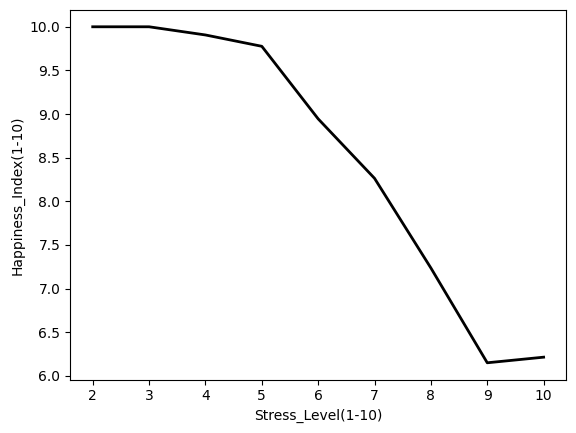

In [46]:
st=data.groupby("Stress_Level(1-10)")["Happiness_Index(1-10)"].mean().reset_index()
print(plt.plot(st["Stress_Level(1-10)"],st["Happiness_Index(1-10)"],linewidth=2,color='k',label='Table'))
plt.xlabel("Stress_Level(1-10)")
plt.ylabel("Happiness_Index(1-10)")

Q9. Create a correlation heatmap (using seaborn) for numeric columns:

Which variables show the strongest correlation with Happiness_Index(1-10)?

Axes(0.125,0.11;0.62x0.77)
                       index  Happiness_Index(1-10)
0      Happiness_Index(1-10)               1.000000
1         Stress_Level(1-10)               0.999988
2        Sleep_Quality(1-10)               0.999978
3     Daily_Screen_Time(hrs)               0.999957
4  Days_Without_Social_Media               0.999919
5   Exercise_Frequency(week)               0.999910
6                        Age               0.998174


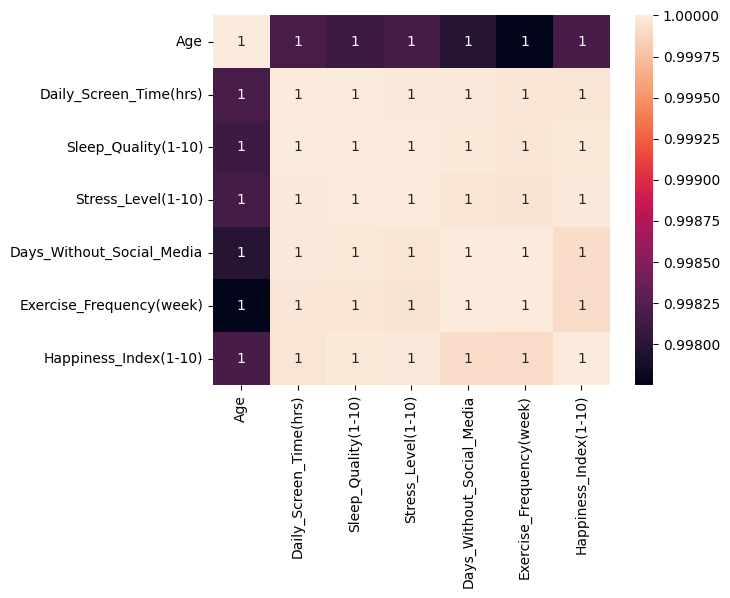

In [53]:
numeric=data.describe(include='number')
corr=numeric.corr()
print(sns.heatmap(annot=True,data=corr))
print(corr["Happiness_Index(1-10)"].sort_values(ascending=False).reset_index())

Q10. Create a box plot of Daily_Screen_Time(hrs) grouped by Social_Media_Platform.
Which platform has users with the longest screen time?





Axes(0.125,0.11;0.775x0.77)


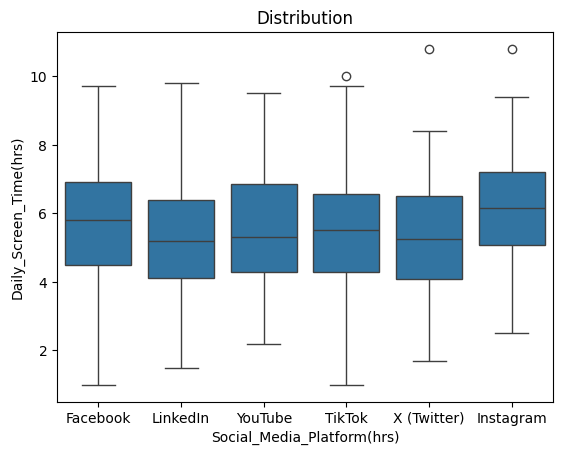

  Social_Media_Platform  Daily_Screen_Time(hrs)
0                TikTok                   518.5


In [58]:
print(sns.boxplot(x='Social_Media_Platform',y='Daily_Screen_Time(hrs)',data=data))
plt.title('Distribution')
plt.xlabel('Social_Media_Platform(hrs)')
plt.ylabel('Daily_Screen_Time(hrs)')
plt.show()

print(data.groupby("Social_Media_Platform")["Daily_Screen_Time(hrs)"].sum().sort_values(ascending=False).head(1).reset_index())

Q10. Does age have any noticeable relationship with happiness levels among participants?
Create a scatter plot where:

- The x-axis represents Age

- The y-axis represents Happiness Score

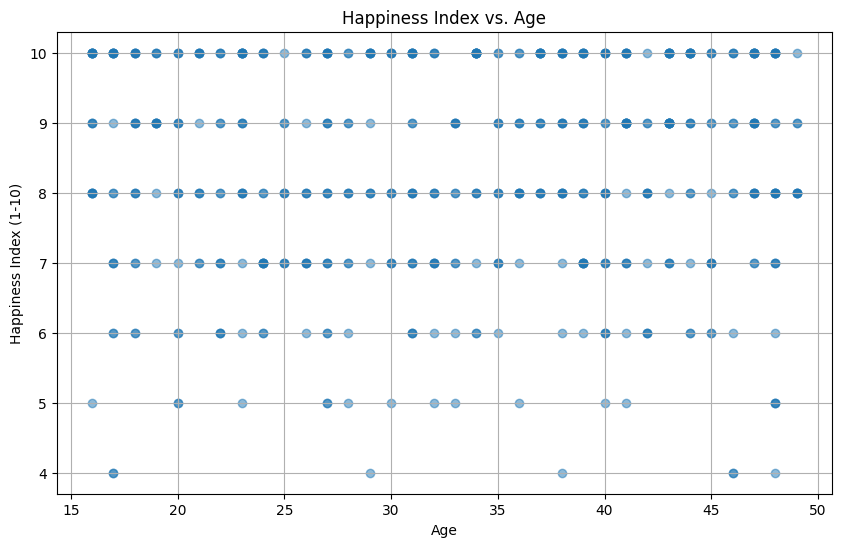

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Happiness_Index(1-10)'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Happiness Index (1-10)')
plt.title('Happiness Index vs. Age')
plt.grid(True)
plt.show()

Q11. Create a pair plot to explore how the following variables are related to each other:
- Age
- Daily Screen Time (hrs)
- Sleep Quality (1–10)
- Stress Level (1–10)
- Happiness Index (1–10)

After plotting, answer the following:
- Do you observe any visible relationship between Daily Screen Time and Stress Level?
- Does Sleep Quality appear to be associated with Happiness Index?

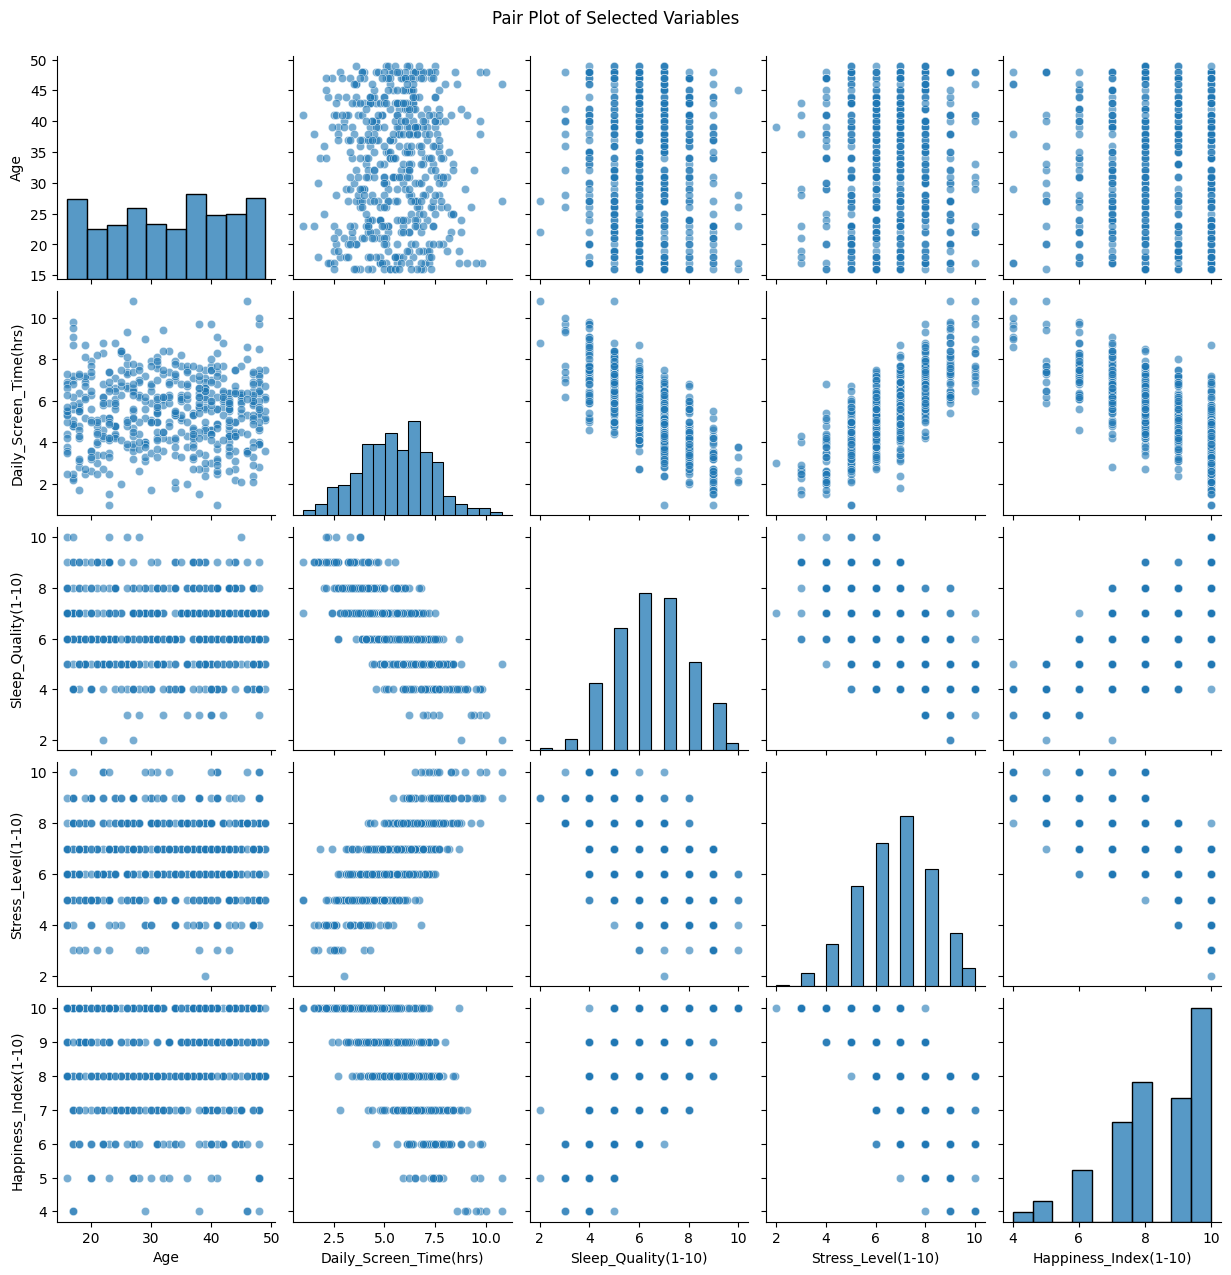

In [62]:
cols_of_interest = [
    'Age',
    'Daily_Screen_Time(hrs)',
    'Sleep_Quality(1-10)',
    'Stress_Level(1-10)',
    'Happiness_Index(1-10)'
]

subset_df = data[cols_of_interest]

sns.pairplot(subset_df, kind='scatter', diag_kind='hist', plot_kws={'alpha':0.6})
plt.suptitle("Pair Plot of Selected Variables", y=1.02)
plt.show()